About Dataset

The The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not.

Source: <a href="https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets">Bank Dataset - Marketing Targets</a>

| Columns | Description | Type | Remarks |
| :- | :- | :- | :- |
| age | numeric | bank client data | |
| job | type of job | bank client data | |
| marital | marital status | bank client data | |
| education | education tier | bank client data | |
| default | has credit in default? | bank client data | |
| balance | average yearly balance, in euros | bank client data | |
| housing | has housing loan? | bank client data | |
| loan | has personal loan? | bank client data | |
| contact | contact communication type | related with last contact of the current campaign | |
| day | last contact day of the month | related with last contact of the current campaign | |
| month | last contact month of year | related with last contact of the current campaign | |
| duration | last contact duration, in seconds | related with last contact of the current campaign | |
| campaign | number of contacts performed during this campaign and for this client | others | |
| previous | number of contacts performed before this campaign and for this client | others | | 
| pdays | number of days that passed by after the client was last contacted from a previous campaign | others | pdays = -1 means client was not previously contacted (previous = 0) | |
| poutcome | outcome of the previous marketing campaign | others | |
| y | has the target subscribed a term deposit? | target variable | |

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats

In [3]:
import pandas as pd
#load the CSV file
df = pd.read_csv(r'C:\Users\Z40\Documents\JakartaLabs\Practice\Banking Marketing Targets.csv')
df['label'] = (df.y == 'yes').astype('int')

print ('Number of samples: ',len(df))

Number of samples:  49732


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
 17  label      49732 non-null  int32 
dtypes: int32(1), int64(7), object(10)
memory usage: 6.6+ MB


In [7]:
df.groupby('y').size()

y
no     43922
yes     5810
dtype: int64

### Missing Values

In [8]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
label        0
dtype: int64

Tidak terdapat nilai kosong (NaN) pada dataset ini.

### Duplicated Data

In [9]:
print(df.duplicated().value_counts())
print(df.duplicated().sum())

False    45211
True      4521
dtype: int64
4521


Terdapat nilai duplikat sebanyak 4521 baris. Selanjutnya nilai duplikat ini akan di hapus (drop).

In [10]:
df = df.drop_duplicates()

In [11]:
# Cek apakah masih trdapat nilai duplikat

df.duplicated().any()

False

In [12]:
cats = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
nums = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Value count kolom marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Value count kolom education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Value count kolom default:
no     44396
yes      815
Name: default, dtype: int64

Value count kolom housing:
yes    25130
no     20081
Name: housing, dtype: int64

Value count kolom loan:
no     37967
yes     7244
Name: loan, dtype: int64

Value count kolom contact:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Value count kolom month:
may    13766
jul     6895
aug     6247
jun     5341
nov     3970

### Mengubah value -1 pada pdays

pdays = -1 means client was not previously contacted (previous = 0)
<br>Kita akan mengubah nilai pdays=-1 menjadi 999 dengan mengasumsikan bahwa 999 hari merupakan waktu yang sangat lama

In [13]:
df['pdays'].replace({-1:999}, inplace = True)
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,label
38392,39,entrepreneur,married,secondary,no,2139,yes,no,cellular,15,may,576,4,371,1,failure,yes,1
7215,35,technician,single,tertiary,no,130,yes,no,unknown,29,may,125,1,999,0,unknown,no,0
36875,43,blue-collar,married,primary,no,-25,yes,no,cellular,12,may,254,4,365,2,failure,no,0


In [14]:
# Melihat deskripsi kolom kategorikal
df[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


### Outlier

In [15]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

for col in ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']:
    zscore = abs(stats.zscore(df[col]))
    filtered = (zscore < 3)
df = df[filtered]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 45211
Jumlah baris setelah memfilter outlier: 44629


### Feature Encoding

In [16]:
df_job = pd.get_dummies(df['job'], prefix='job')
df = df.join(df_job)

df_education = pd.get_dummies(df['education'], prefix='education')
df = df.join(df_education)

df_default = pd.get_dummies(df['default'], prefix='default')
df = df.join(df_default)

df_campaign = pd.get_dummies(df['campaign'], prefix='campaign')
df = df.join(df_campaign)

df_housing = pd.get_dummies(df['housing'], prefix='loan')
df = df.join(df_housing)

df_contact = pd.get_dummies(df['contact'], prefix='contact')
df = df.join(df_contact)

df_poutcome = pd.get_dummies(df['poutcome'], prefix='poutcome')
df = df.join(df_poutcome)

df_day = pd.get_dummies(df['day'], prefix='day')
df = df.join(df_day)

df_month = pd.get_dummies(df['month'], prefix='month')
df = df.join(df_month)

df = df.drop(columns=['job', 'campaign', 'education', 'day', 'default', 'marital', 'contact', 'month', 'housing',
                      'loan', 'poutcome', 'y'])

In [17]:
df.head()

,age,balance,duration,pdays,previous,label,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,261,999,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,151,999,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,76,999,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,92,999,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,198,999,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Feature Transformation

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df['age'] = StandardScaler().fit_transform(df['age'].values.reshape(len(df), 1))
df['balance'] = StandardScaler().fit_transform(df['balance'].values.reshape(len(df), 1))
df['duration'] = StandardScaler().fit_transform(df['duration'].values.reshape(len(df), 1))
df['pdays'] = StandardScaler().fit_transform(df['pdays'].values.reshape(len(df), 1))

### Train - Test Split

In [19]:
X = df.drop(columns=['label'])
y = df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Imbalanced Data

In [20]:
from imblearn import under_sampling, over_sampling
from collections import Counter
X_train_over, y_train_over = over_sampling.SMOTE().fit_resample(X_train, y_train)
print('Original Dataset:', Counter(y_train))
print('Resample Dataset', Counter(y_train_over))

Original Dataset: Counter({0: 29623, 1: 3848})
Resample Dataset Counter({0: 29623, 1: 29623})


# Modelling

### 1. Logistic Regression

In [22]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
model = lr.fit(X_train_over, y_train_over)

y_pred = model.predict(X_test)
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_over)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train_over)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_over, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X_train_over, y_train_over, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

eval_classification(lr)
print(classification_report(y_test, y_pred))

Accuracy (Test Set): 0.90
Precision (Test Set): 0.61
Recall (Test Set): 0.39
F1-Score (Test Set): 0.47
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.99
roc_auc (crossval train): 0.9861759431692902
roc_auc (crossval test): 0.9755395586116361
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9860
           1       0.61      0.39      0.47      1298

    accuracy                           0.90     11158
   macro avg       0.77      0.68      0.71     11158
weighted avg       0.89      0.90      0.89     11158



In [1]:
X_test

NameError: name 'X_test' is not defined

### Hyperparameter Tuning - Logistic Regression

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

penalty = ['l1', 'l2']
C = np.logspace(10, 50, 10)
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression(random_state = 42)
gs = GridSearchCV(logreg, hyperparameters, cv=10)
best_model = gs.fit(X_train_over, y_train_over)

def eval_classification(model):
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train_over)
    y_pred_proba = best_model.predict_proba(X_test)
    y_pred_proba_train = best_model.predict_proba(X_train_over)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_over, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X_train_over, y_train_over, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

eval_classification(gs)
print(classification_report(y_test, y_pred))

Accuracy (Test Set): 0.90
Precision (Test Set): 0.61
Recall (Test Set): 0.37
F1-Score (Test Set): 0.46
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.99
roc_auc (crossval train): 0.9868007743247545
roc_auc (crossval test): 0.9586653237578611
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9860
           1       0.55      0.54      0.55      1298

    accuracy                           0.90     11158
   macro avg       0.75      0.74      0.74     11158
weighted avg       0.89      0.90      0.90     11158



In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

print('Confusion Matrix:')
print(confusion_matrix(y_pred, y_test))

Confusion Matrix:
[[9541  798]
 [ 319  500]]


### 2. Random Forest

In [25]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
model_rf = rf.fit(X_train_over, y_train_over)

y_pred = model_rf.predict(X_test)
def eval_classification(model):
    y_pred = model_rf.predict(X_test)
    y_pred_train = model_rf.predict(X_train_over)
    y_pred_proba = model_rf.predict_proba(X_test)
    y_pred_proba_train = model_rf.predict_proba(X_train_over)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_over, y_pred_proba_train[:, 1]))

    score = cross_validate(model_rf, X_train_over, y_train_over, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

eval_classification(rf)
print(classification_report(y_test, y_pred))

Accuracy (Test Set): 0.89
Precision (Test Set): 0.53
Recall (Test Set): 0.59
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9923309282052479
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      9860
           1       0.53      0.59      0.56      1298

    accuracy                           0.89     11158
   macro avg       0.74      0.76      0.75     11158
weighted avg       0.90      0.89      0.89     11158



### Hyperparameter Tuning - Random Forest

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {"criterion": ["gini"], "min_samples_split": [2, 10, 20],
"max_depth": [2, 5, 10],"max_features": [10, 20, 30]}

rf = RandomForestClassifier()
rf_random = GridSearchCV(rf, param_grid, cv=5)
rf_random.fit(X_train_over, y_train_over)

def eval_classification(model):
    y_pred = rf_random.predict(X_test)
    y_pred_train = rf_random.predict(X_train_over)
    y_pred_proba = rf_random.predict_proba(X_test)
    y_pred_proba_train = rf_random.predict_proba(X_train_over)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_over, y_pred_proba_train[:, 1]))

    score = cross_validate(rf_random, X_train_over, y_train_over, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

eval_classification(rf_random)
print(classification_report(y_test, y_pred))

Accuracy (Test Set): 0.84
Precision (Test Set): 0.41
Recall (Test Set): 0.83
F1-Score (Test Set): 0.55
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.97
roc_auc (crossval train): 0.9647920369684687
roc_auc (crossval test): 0.9528717022080405
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9860
           1       0.55      0.54      0.55      1298

    accuracy                           0.90     11158
   macro avg       0.75      0.74      0.74     11158
weighted avg       0.89      0.90      0.90     11158



### 3. Stochastic Gradient Descent

In [26]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(loss = 'log',alpha = 0.1, random_state = 42)
model_sgdc = sgdc.fit(X_train_over, y_train_over)

y_pred = model_sgdc.predict(X_test)
def eval_classification(model):
    y_pred = model_sgdc.predict(X_test)
    y_pred_train = model_sgdc.predict(X_train_over)
    y_pred_proba = model_sgdc.predict_proba(X_test)
    y_pred_proba_train = model_sgdc.predict_proba(X_train_over)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_over, y_pred_proba_train[:, 1]))

    score = cross_validate(model_sgdc, X_train_over, y_train_over, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

eval_classification(sgdc)
print(classification_report(y_test, y_pred))

Accuracy (Test Set): 0.83
Precision (Test Set): 0.37
Recall (Test Set): 0.73
F1-Score (Test Set): 0.49
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.90
roc_auc (crossval train): 0.9027403831932471
roc_auc (crossval test): 0.9023429773615698
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      9860
           1       0.37      0.73      0.49      1298

    accuracy                           0.83     11158
   macro avg       0.67      0.78      0.69     11158
weighted avg       0.89      0.83      0.85     11158



### 4. Gradient Boosting Classifier

In [27]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
model_gbc = gbc.fit(X_train_over, y_train_over)

y_pred = model_gbc.predict(X_test)
def eval_classification(model):
    y_pred = model_gbc.predict(X_test)
    y_pred_train = model_gbc.predict(X_train_over)
    y_pred_proba = model_gbc.predict_proba(X_test)
    y_pred_proba_train = model_gbc.predict_proba(X_train_over)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_over, y_pred_proba_train[:, 1]))

    score = cross_validate(model_gbc, X_train_over, y_train_over, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

eval_classification(gbc)
print(classification_report(y_test, y_pred))

Accuracy (Test Set): 0.90
Precision (Test Set): 0.55
Recall (Test Set): 0.54
F1-Score (Test Set): 0.55
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.99
roc_auc (crossval train): 0.9917411699397801
roc_auc (crossval test): 0.9783576836625084
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9860
           1       0.55      0.54      0.55      1298

    accuracy                           0.90     11158
   macro avg       0.75      0.74      0.74     11158
weighted avg       0.89      0.90      0.90     11158



## Feature Importance

### Feature Importance - Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
model = lr.fit(X_train_over, y_train_over)

importances = pd.DataFrame(data={
    'Attribute LogReg': X_train.columns,
    'Importance': model.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=False)

importances_logreg = importances[importances.Importance > 0]
importances_logreg

,Attribute LogReg,Importance
2,duration,1.172874
4,previous,0.023698
3,pdays,0.018926
1,balance,0.014187


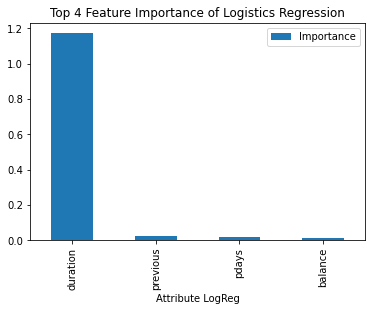

In [29]:
importances_logreg.plot.bar(x='Attribute LogReg', y='Importance', title="Top 4 Feature Importance of Logistics Regression");
plt.show()

### Explainable AI - LogReg

In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [37]:
import shap
explainer = shap.LinearExplainer(lr, X_test)
shap_values = explainer.shap_values(X_test)

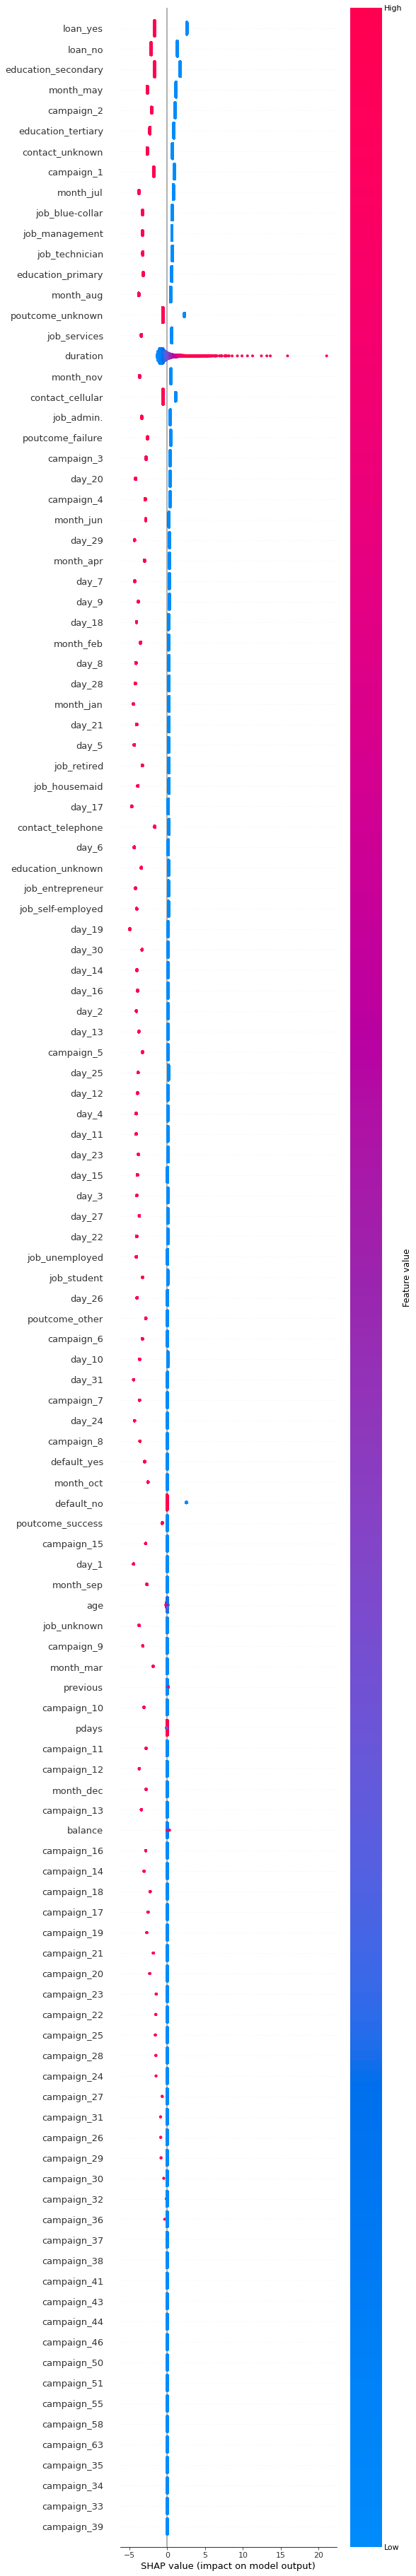

In [39]:
shap.summary_plot(shap_values, X_test, max_display=X_test.shape[1], 
                  feature_names=X_test.columns)

Dari hasil prediksi model LogReg, konversi meningkat dari sebelumnya 11,7% menjadi 38%